In [1]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
import seaborn as sns
from pybaseball import pitching_stats, batting_stats

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA, NMF
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.svm import SVC

In [2]:
seasons = [2012,2013,2014,2015,2016,2017,2018,2019]

In [11]:
pitch_data = pitching_stats(2012,2018)

In [12]:
pitch_data.to_csv(f'pitch_data.csv')

In [13]:
pitch_data.sample(n=20)

,Season,Name,Team,Age,W,L,ERA,WAR,G,GS,...,wSL/C (pi),wXX/C (pi),O-Swing% (pi),Z-Swing% (pi),Swing% (pi),O-Contact% (pi),Z-Contact% (pi),Contact% (pi),Zone% (pi),Pace (pi)
4846,2016.0,Parker Bridwell,Orioles,24.0,0.0,0.0,13.50,-0.1,2.0,0.0,...,NaN,NaN,0.320,0.618,0.492,0.375,0.857,0.724,0.576,21.9
2113,2014.0,Xavier Cedeno,Nationals,27.0,0.0,0.0,3.86,0.0,9.0,0.0,...,NaN,NaN,0.283,0.667,0.509,0.462,0.977,0.860,0.589,25.2
3205,2015.0,Tommy Kahnle,Rockies,25.0,0.0,1.0,4.86,0.0,36.0,0.0,...,-4.78,NaN,0.292,0.582,0.423,0.500,0.790,0.680,0.452,26.2
4751,2016.0,David Goforth,Brewers,27.0,0.0,0.0,10.97,-0.1,10.0,0.0,...,-0.97,NaN,0.349,0.655,0.485,0.605,0.912,0.790,0.444,26.7
2263,2016.0,David Price,Red Sox,30.0,17.0,9.0,3.99,4.4,35.0,35.0,...,NaN,4.14,0.324,0.670,0.505,0.659,0.809,0.763,0.521,26.0
2456,2014.0,Marco Gonzales,Cardinals,22.0,4.0,2.0,4.15,0.0,10.0,5.0,...,-0.12,NaN,0.285,0.605,0.427,0.571,0.874,0.762,0.445,21.6
1542,2012.0,Ross Detwiler,Nationals,26.0,10.0,8.0,3.40,1.6,33.0,27.0,...,NaN,NaN,0.290,0.644,0.470,0.727,0.895,0.844,0.508,21.6
944,2016.0,Dustin McGowan,Marlins,34.0,1.0,3.0,2.82,0.0,55.0,0.0,...,3.16,NaN,0.375,0.671,0.491,0.517,0.848,0.695,0.394,24.6
3610,2013.0,Luis Perez,Blue Jays,28.0,0.0,1.0,5.40,0.1,6.0,0.0,...,5.34,NaN,0.242,0.692,0.518,0.750,0.778,0.773,0.612,23.0
3425,2015.0,Jacob Lindgren,Yankees,22.0,0.0,0.0,5.14,-0.2,7.0,0.0,...,4.03,NaN,0.381,0.692,0.522,0.458,0.861,0.700,0.452,22.4


In [69]:
hit_data = batting_stats(start_season=2012,end_season=2018,qual=50)

In [70]:
hit_data.to_csv(f'hit_data.csv')

In [77]:
hit_data = pd.read_csv('hit_data.csv')

In [78]:
hit_data

,Unnamed: 0,Season,Name,Team,Age,G,AB,PA,H,1B,...,wSL/C (pi),wXX/C (pi),O-Swing% (pi),Z-Swing% (pi),Swing% (pi),O-Contact% (pi),Z-Contact% (pi),Contact% (pi),Zone% (pi),Pace (pi)
0,3,2018.0,Mookie Betts,Red Sox,25.0,136.0,520.0,614.0,180.0,96.0,...,1.93,NaN,0.185,0.535,0.356,0.658,0.926,0.855,0.490,23.3
1,18,2013.0,Mike Trout,Angels,21.0,157.0,589.0,716.0,190.0,115.0,...,1.06,NaN,0.236,0.530,0.375,0.696,0.882,0.821,0.475,24.9
2,43,2012.0,Mike Trout,Angels,20.0,139.0,559.0,639.0,182.0,117.0,...,3.91,NaN,0.248,0.533,0.396,0.700,0.867,0.817,0.518,23.7
3,49,2012.0,Buster Posey,Giants,25.0,148.0,530.0,610.0,178.0,114.0,...,-1.11,NaN,0.251,0.588,0.418,0.742,0.899,0.852,0.496,22.9
4,5,2018.0,Mike Trout,Angels,26.0,140.0,471.0,608.0,147.0,80.0,...,2.55,-5.67,0.198,0.555,0.376,0.660,0.903,0.839,0.498,23.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3872,2881,2014.0,A.J. Ellis,Dodgers,33.0,93.0,283.0,347.0,54.0,42.0,...,-0.68,NaN,0.194,0.530,0.372,0.672,0.899,0.843,0.530,23.4
3873,3083,2014.0,Michael Choice,Rangers,24.0,86.0,253.0,280.0,46.0,30.0,...,-2.10,NaN,0.295,0.536,0.416,0.620,0.862,0.776,0.502,21.5
3874,3325,2013.0,Rob Brantly,Marlins,23.0,67.0,223.0,243.0,47.0,37.0,...,-3.10,NaN,0.306,0.633,0.467,0.470,0.921,0.771,0.493,22.5
3875,2815,2012.0,Rod Barajas,Pirates,36.0,104.0,321.0,361.0,66.0,44.0,...,-1.52,NaN,0.380,0.684,0.531,0.623,0.885,0.790,0.496,23.8


In [79]:
hit_data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [80]:
# drop pi columns
hit_data.drop(list(hit_data.filter(regex='(pi)')),axis=1,inplace=True)

In [81]:
# drop pfx columns
hit_data.drop(list(hit_data.filter(regex='(pfx)')),axis=1,inplace=True)

In [82]:
# drop other unneeded columns
hit_data.drop(['Season','Name','Team','IFFB','Pitches','Balls','Strikes','IFH','BUH','Dol',
              'FB% (Pitch)','FBv','SL%','SLv','CT%','CTv','CB%','CBv','CH%',
               'CHv','SF%','SFv','KN%','KNv','XX%','Age Rng'],axis=1,inplace=True)

In [83]:
import seaborn as sns

In [84]:
def round_of_war(number):
    """Round a number to the closest half integer.
    >>> round_of_war(1.3)
    1.5
    >>> round_of_war(2.6)
    2.5
    >>> round_of_war(3.0)
    3.0
    >>> round_of_war(4.1)
    4.0"""

    return round(number * 2.0) / 2.0

In [85]:
# round WARs so we get more of a "classifier" than a regression
hit_data['WAR'] = hit_data['WAR'].apply(round_of_war)

In [86]:
# there are some extremes, remove them.
hit_data.drop(hit_data[(hit_data['WAR'] <= -2.5) | (hit_data['WAR'] == 10.5)].index, inplace = True) 

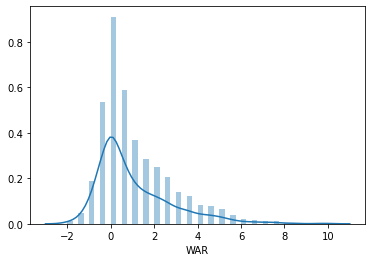

In [87]:
sns.distplot(hit_data['WAR'])

In [88]:
# see if we have any na values. I say drop these columns
for column in hit_data.columns:
    if hit_data[column].isnull().sum() > 0:
#    if np.isinf(hit_data[column]).sum() > 0:
        print(f'{column} ---- {hit_data[column].isnull().sum()}')
#        print(f'{column} ---- {np.isinf(hit_data[column]).sum()}')

Fld ---- 314
phLI ---- 557
PO% ---- 3874
wCT ---- 5
wCH ---- 2
wSF ---- 344
wKN ---- 2476
wCT/C ---- 5
wCH/C ---- 2
wSF/C ---- 344
wKN/C ---- 2476
UBR ---- 305
wGDP ---- 305


In [60]:
hit_data.dropna(axis=1, inplace=True)

In [27]:
hit_data[hit_data.isin([np.nan, np.inf, -np.inf]).any(1)]

,Age,G,AB,PA,H,1B,2B,3B,HR,R,...,wSB,Off,Lg,Pull%,Cent%,Oppo%,Soft%,Med%,Hard%,TTO%


In [63]:
# split seasons 12-18 into test/train
seed = 234
x_train, x_test, y_train, y_test = train_test_split(hit_data.drop('WAR', axis=1),
                                                    hit_data['WAR'],
                                                    train_size=0.75,
                                                    random_state=seed,
                                                    stratify=hit_data['WAR'])

In [64]:
le = LabelEncoder()
le.fit(y_train)

LabelEncoder()

In [65]:
le.fit_transform(y_train)

array([11,  7,  5, ...,  2,  4,  5], dtype=int64)

In [67]:
pca = PCA(n_components=50, svd_solver='randomized',
          whiten=True).fit(x_train)

In [68]:
#eigenfaces = pca.components_.reshape((50, h, w))
pca.score

<bound method PCA.score of PCA(n_components=50, svd_solver='randomized', whiten=True)>

In [69]:
# make a pipeline
pipe = Pipeline([('reduce_dim', PCA()),
                 ('classify', SVC(random_state=seed))])

In [70]:
N_FEATURES_OPTIONS = [10, 20, 50]
C_OPTIONS = [1, 10, 100, 1000]

In [71]:
param_grid = [
    {
        'reduce_dim': [PCA(iterated_power=7), NMF()],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'classify__C': C_OPTIONS
    },
    {
        'reduce_dim': [SelectKBest(chi2)],
        'reduce_dim__k': N_FEATURES_OPTIONS,
        'classify__C': C_OPTIONS
    },
]

In [72]:
grid = GridSearchCV(pipe, cv=3, n_jobs=2, param_grid=param_grid)

In [73]:
grid.fit(x_train, le.fit_transform(y_train))

c:\python\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('reduce_dim', PCA()),
                                       ('classify', SVC(random_state=234))]),
             n_jobs=2,
             param_grid=[{'classify__C': [1, 10, 100, 1000],
                          'reduce_dim': [PCA(iterated_power=7, n_components=50),
                                         NMF()],
                          'reduce_dim__n_components': [10, 20, 50]},
                         {'classify__C': [1, 10, 100, 1000],
                          'reduce_dim': [SelectKBest(score_func=<function chi2 at 0x0000022E429DA700>)],
                          'reduce_dim__k': [10, 20, 50]}])

In [74]:
grid.best_score_, grid.best_params_

(0.7738427761999391,
 {'classify__C': 1000,
  'reduce_dim': PCA(iterated_power=7, n_components=50),
  'reduce_dim__n_components': 50})

In [75]:
x_train

,Age,G,AB,PA,H,1B,2B,3B,HR,R,...,wSB,Off,Lg,Pull%,Cent%,Oppo%,Soft%,Med%,Hard%,TTO%
393,25.0,158.0,599.0,667.0,178.0,122.0,33.0,5.0,18.0,98.0,...,-0.1,21.7,2.3,0.368,0.346,0.287,0.180,0.491,0.329,0.280
1034,30.0,96.0,290.0,318.0,93.0,61.0,24.0,2.0,6.0,38.0,...,-0.3,15.2,1.0,0.314,0.372,0.314,0.141,0.488,0.372,0.258
1928,26.0,81.0,270.0,299.0,63.0,44.0,9.0,1.0,9.0,24.0,...,-0.5,-8.3,0.5,0.348,0.343,0.309,0.194,0.522,0.284,0.348
1217,25.0,91.0,283.0,309.0,75.0,44.0,16.0,2.0,13.0,54.0,...,-0.2,3.9,1.0,0.355,0.430,0.215,0.086,0.538,0.376,0.430
8,29.0,158.0,620.0,711.0,184.0,100.0,41.0,2.0,41.0,122.0,...,0.8,48.8,2.4,0.429,0.335,0.237,0.144,0.483,0.373,0.347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,31.0,54.0,171.0,192.0,42.0,30.0,7.0,0.0,5.0,17.0,...,-0.1,-4.7,0.7,0.418,0.356,0.226,0.144,0.555,0.301,0.266
1423,28.0,51.0,78.0,89.0,14.0,6.0,2.0,2.0,4.0,15.0,...,0.6,-0.9,0.1,0.360,0.380,0.260,0.180,0.440,0.380,0.483
3669,23.0,24.0,74.0,82.0,14.0,12.0,1.0,1.0,0.0,7.0,...,-0.1,-7.3,0.1,0.455,0.291,0.255,0.164,0.582,0.255,0.329
2237,26.0,111.0,345.0,377.0,104.0,71.0,21.0,3.0,9.0,45.0,...,-0.4,0.4,0.3,0.317,0.370,0.313,0.106,0.577,0.317,0.318


In [76]:
hit_data

,Age,G,AB,PA,H,1B,2B,3B,HR,R,...,wSB,Off,Lg,Pull%,Cent%,Oppo%,Soft%,Med%,Hard%,TTO%
1,21.0,157.0,589.0,716.0,190.0,115.0,39.0,9.0,27.0,109.0,...,3.1,70.5,2.8,0.308,0.382,0.310,0.113,0.508,0.380,0.381
2,20.0,139.0,559.0,639.0,182.0,117.0,27.0,8.0,30.0,129.0,...,7.0,64.4,2.8,0.323,0.384,0.293,0.143,0.529,0.328,0.369
3,25.0,148.0,530.0,610.0,178.0,114.0,39.0,1.0,24.0,78.0,...,-1.0,41.8,0.5,0.382,0.363,0.255,0.108,0.576,0.316,0.310
4,26.0,140.0,471.0,608.0,147.0,80.0,24.0,4.0,39.0,101.0,...,3.5,70.5,1.9,0.402,0.373,0.225,0.160,0.396,0.444,0.469
5,24.0,159.0,549.0,681.0,173.0,107.0,32.0,5.0,29.0,123.0,...,2.6,67.0,2.9,0.405,0.329,0.266,0.120,0.463,0.417,0.414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3870,37.0,149.0,593.0,636.0,143.0,103.0,17.0,0.0,23.0,53.0,...,0.3,-24.2,2.1,0.474,0.347,0.179,0.159,0.490,0.351,0.241
3871,36.0,120.0,440.0,485.0,108.0,77.0,20.0,0.0,11.0,39.0,...,-0.2,-20.4,1.7,0.413,0.360,0.228,0.177,0.517,0.306,0.194
3872,33.0,93.0,283.0,347.0,54.0,42.0,9.0,0.0,3.0,21.0,...,-0.4,-18.4,0.7,0.322,0.373,0.305,0.185,0.545,0.270,0.326
3873,24.0,86.0,253.0,280.0,46.0,30.0,6.0,1.0,9.0,20.0,...,0.0,-15.8,0.9,0.390,0.401,0.209,0.214,0.529,0.257,0.354
